# Your Final Project Title

- Keeley: put their contribution here
- Goar: put their contribution here
- Isaac: put their contribution here
- Jim: put their contribution here
- Vik: put their contribution here 


# Introduction

### This project is about analyzing Twitter tweets' sentiments about a selection of video games. The video games to be analyzed are: 
##### Borderlands, Call of Duty Black Ops Cold War, Overwatch, NBA2k, Dota 2, World of War Craft, CS-GO, Assasin's Creed, Apex Legends, League of Legends, Fortnite, Battlefield, Heartstone, PUB G, FIFA, RDR, Rainbow Six, GTA, Madden NFL, Cyberpunk 2077, Ghost Recon, and Hearthstone. 

# Research Question
##### Which video game will have the most positive sentiment analysis on Twitter?
##### Which video game will have the most negative sentiment analysis?


# Dataset Description

In [ ]:
# Install necessary libraries

In [57]:
!pip install nltk
!pip install -U textblob

In [58]:
# import necessary functions
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

#### df.describe

In [59]:
vg = pd.read_csv('twitter_training.csv')

In [60]:
vg.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [61]:
column_names = vg.columns

column_names

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [62]:
print(vg['im getting on borderlands and i will murder you all ,'])

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: im getting on borderlands and i will murder you all ,, Length: 74681, dtype: object


In [63]:
vg.rename(columns={'2401': 'Sentiment_Batch', 'Borderlands': 'Video_Game', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet'}, inplace=True)

In [64]:
vg.head()

,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [65]:
vg.describe()

,Sentiment_Batch
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


# Preprocessing

In [66]:
# Drop Missing Data
vg.dropna(inplace=True)

# Drop Duplicates
vg.drop_duplicates()


,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [67]:
values_to_delete = ['Nvidia', 'johnson&johnson','Facebook', 'HomeDepot', 'Verizon', 'Microsoft', 'Google', 'PlayStation5(PS5)', 'Xbox(Xseries)', 'Amazon']
filtered_vg = vg[~vg['Video_Game'].isin(values_to_delete)]

In [69]:
# text cleaning
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|https\S+|pic\S+', '', text, flags=re.MULTILINE)  # remove URLs
        text = re.sub(r'@\w+', '', text)  # remove mentions
        text = re.sub(r'\s*@+\s*', ' ', text) # remove mentions with extra spaces
        text = re.sub(r'#\w+', '', text)  # remove hashtags
        text = re.sub(r'\s+', ' ', text)  # remove extra spaces
        text = re.sub(r'-', '', text) #remove hyphens
        text = re.sub(r'[><]', '', text) #remove greater/less than signs
        text = re.sub(r'[\\/]', '', text) #remove /\ signs
        text = re.sub(r'\.', '', text) # remove "."
        text = re.sub(r'\,', '', text) #remove ","
        text = re.sub(r'unk', '', text) # remove "unk"        
        return text.strip()
    else:
        return text
    

filtered_vg['Clean_Text'] = filtered_vg['Tweet'].apply(clean_text)

/tmp/ipykernel_82/606862506.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vg['Clean_Text'] = filtered_vg['Tweet'].apply(clean_text)


# Analysis

In [71]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text): 
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0: 
        return "Negative" 
    else: 
        return "Neutral" 

In [72]:
filtered_vg["Sentiment_Textblob"] = filtered_vg["Clean_Text"].apply(get_sentiment_textblob)

/tmp/ipykernel_82/2251358302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vg["Sentiment_Textblob"] = filtered_vg["Clean_Text"].apply(get_sentiment_textblob)


In [81]:
filtered_vg.head()

,Sentiment_Batch,Video_Game,Sentiment,Tweet,Clean_Text,Sentiment_Textblob
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,Neutral
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,Neutral
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,Neutral
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,Neutral
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,Neutral


In [90]:
# delete useless columns

columns_to_delete = ['Sentiment_Batch', 'Sentiment', 'Tweet'] 
sentiment_data = filtered_vg.drop(columns=columns_to_delete)

In [108]:
sentiment_data.head(50)

,Video_Game,Clean_Text,Sentiment_Textblob
0,Borderlands,I am coming to the borders and I will kill you...,Neutral
1,Borderlands,im getting on borderlands and i will kill you all,Neutral
2,Borderlands,im coming on borderlands and i will murder you...,Neutral
3,Borderlands,im getting on borderlands 2 and i will murder ...,Neutral
4,Borderlands,im getting into borderlands and i can murder y...,Neutral
5,Borderlands,So I spent a few hours making something for fu...,Positive
6,Borderlands,So I spent a couple of hours doing something f...,Positive
7,Borderlands,So I spent a few hours doing something for fun...,Positive
8,Borderlands,So I spent a few hours making something for fu...,Positive
9,Borderlands,2010 So I spent a few hours making something f...,Positive


# Visualization

In [83]:
# Define the colors for positive and negative sentiments
sentiment_colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral' : 'blue'
}

In [85]:
print(sentiment_colors['Positive'])

green


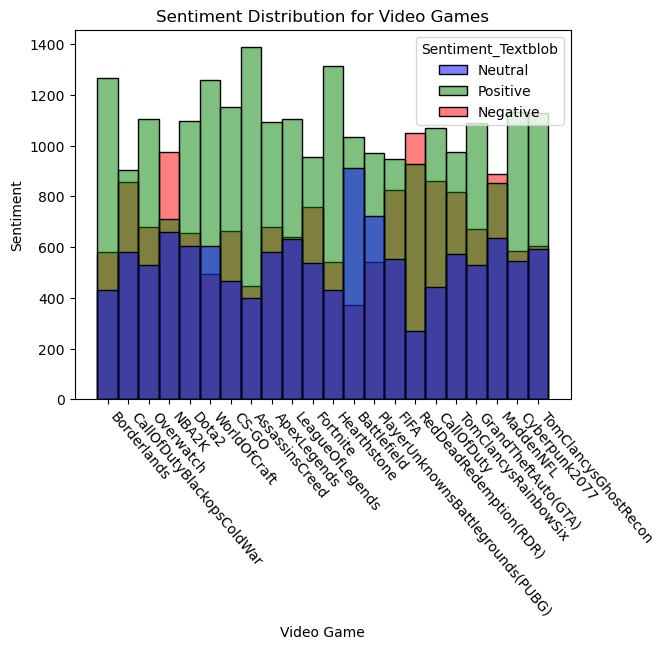

In [110]:
sns.histplot(x='Video_Game', hue='Sentiment_Textblob', data=sentiment_data, palette=sentiment_colors)
plt.xticks(rotation= -50, ha='left')
plt.xlabel('Video Game')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution for Video Games')
plt.show()

In [93]:
# Create the count plot
sns.countplot(x='Video_Game', hue='Sentiment', data=filtered_vg, palette=sentiment_colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Game')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution for Video Games')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

KeyError: 'Irrelevant'

# Results/Findings

# Contribution